# Mid-Term Project

Problem Statement: Predict whether patients will have reccurant events

In [311]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import seaborn as sns

In [312]:
# fetch dataset, save as breast cancer dataframe (bcdf)
column_labels = ['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
bcdf = pd.read_csv('breast-cancer.data')
bcdf.columns = column_labels

### Exploratory Data Analysis

In [313]:
bcdf.shape

(285, 10)

In [314]:
bcdf.head(30)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
5,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
6,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
7,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
8,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
9,no-recurrence-events,40-49,premeno,0-4,0-2,no,3,left,central,no


In [315]:
bcdf.describe(include='all')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,285,285,285,285,285,285,285.000000,285,285,285
unique,2,6,3,11,7,3,NaN,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,NaN,left,left_low,no
freq,200,96,149,59,212,221,NaN,151,109,217
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.045614,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.737351,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


In [316]:
for column in column_labels:
    print(column, bcdf[column].unique())

Class ['no-recurrence-events' 'recurrence-events']
age ['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
menopause ['premeno' 'ge40' 'lt40']
tumor-size ['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps ['no' 'yes' '?']
deg-malig [2 1 3]
breast ['right' 'left']
breast-quad ['right_up' 'left_low' 'left_up' 'right_low' 'central' '?']
irradiat ['no' 'yes']


In this dataset, '?' signifies missing data, so calling .unique() will display which columns have missing data (if any).  Columns 'node-caps' and 'breast-quad' have missing data.  Fill in missing data with data that is most common.  For 'node-caps' attribute, the most common value is 'no' with 221 out of 285 being 'no'.  For 'breast-quad' attribute, the most common value is 'low_left' with 109 out of 285 being 'low_left'.

In [317]:
bcdf['node-caps'].replace(to_replace='?', value='no', inplace=True)
bcdf['breast-quad'].replace(to_replace='?', value='left_low', inplace=True)

In [318]:
bcdf.describe(include='all')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,285,285,285,285,285,285,285.000000,285,285,285
unique,2,6,3,11,7,2,NaN,2,5,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,NaN,left,left_low,no
freq,200,96,149,59,212,229,NaN,151,110,217
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.045614,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.737351,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


In [319]:
for column in column_labels:
    print(column, bcdf[column].unique())

Class ['no-recurrence-events' 'recurrence-events']
age ['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
menopause ['premeno' 'ge40' 'lt40']
tumor-size ['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps ['no' 'yes']
deg-malig [2 1 3]
breast ['right' 'left']
breast-quad ['right_up' 'left_low' 'left_up' 'right_low' 'central']
irradiat ['no' 'yes']


There is no more missing data. Next I need to replace the categorical data with numerical data.  The 'Class', 'node-cap', 'breast', and 'irradiat' attributes can be binarized. 

In [320]:
bcdf['Class'].replace(to_replace='no-recurrence-events', value='0', inplace=True)
bcdf['Class'].replace(to_replace='recurrence-events', value='1', inplace=True)

bcdf['node-caps'].replace(to_replace='no', value='0', inplace=True)
bcdf['node-caps'].replace(to_replace='yes', value='1', inplace=True)

bcdf['breast'].replace(to_replace='right', value='0', inplace=True)
bcdf['breast'].replace(to_replace='left', value='1', inplace=True)

bcdf['irradiat'].replace(to_replace='no', value='0', inplace=True)
bcdf['irradiat'].replace(to_replace='yes', value='1', inplace=True)

Utilize label encoding

In [321]:
oe_age = OrdinalEncoder(categories=[['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']])
oe_meo = OrdinalEncoder(categories=[['lt40', 'ge40', 'premeno']])
oe_ts = OrdinalEncoder(categories=[['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59']])
oe_iv = OrdinalEncoder(categories=[['0-2','3-5','6-8','9-11','12-14','15-17','18-20','21-23','24-26','27-29','30-32','33-35','36-39']])

bcdf['age'] = oe_age.fit_transform(bcdf[['age']])
bcdf['menopause'] = oe_meo.fit_transform(bcdf[['menopause']])
bcdf['tumor-size'] = oe_ts.fit_transform(bcdf[['tumor-size']])
bcdf['inv-nodes'] = oe_iv.fit_transform(bcdf[['inv-nodes']])

Use One Hot Encoder to binarize nominal data (breast-quad)

In [322]:
print(bcdf['breast-quad'].unique())
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
breastquadtransform = ohe.fit_transform(bcdf[['breast-quad']])

['right_up' 'left_low' 'left_up' 'right_low' 'central']


In [323]:
bcdf = pd.concat([bcdf, breastquadtransform], axis=1)
bcdf.drop(['breast-quad'], axis=1, inplace=True)
bcdf.head(20)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,0,3.0,2.0,4.0,0.0,0,2,0,0,0.0,0.0,0.0,0.0,1.0
1,0,3.0,2.0,4.0,0.0,0,2,1,0,0.0,1.0,0.0,0.0,0.0
2,0,5.0,1.0,3.0,0.0,0,2,0,0,0.0,0.0,1.0,0.0,0.0
3,0,3.0,2.0,0.0,0.0,0,2,0,0,0.0,0.0,0.0,1.0,0.0
4,0,5.0,1.0,3.0,0.0,0,2,1,0,0.0,1.0,0.0,0.0,0.0
5,0,4.0,2.0,5.0,0.0,0,2,1,0,0.0,1.0,0.0,0.0,0.0
6,0,5.0,1.0,4.0,0.0,0,1,1,0,0.0,1.0,0.0,0.0,0.0
7,0,3.0,2.0,10.0,0.0,0,2,1,0,0.0,1.0,0.0,0.0,0.0
8,0,3.0,2.0,4.0,0.0,0,2,0,0,0.0,0.0,1.0,0.0,0.0
9,0,3.0,2.0,0.0,0.0,0,3,1,0,1.0,0.0,0.0,0.0,0.0


In [324]:
bcdf.corr()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
Class,1.000000,-0.075897,0.051173,0.176498,0.275144,0.275989,0.303457,0.060927,0.192887,-0.066439,0.050304,-0.047424,-0.031979,0.075694
age,-0.075897,1.000000,-0.670007,-0.007522,-0.037947,-0.057262,-0.079114,0.047497,-0.045551,-0.000983,0.023482,0.051425,-0.088888,-0.033930
menopause,0.051173,-0.670007,1.000000,0.028768,0.001468,0.066170,-0.012875,-0.080146,0.077055,-0.035930,-0.010635,-0.058625,0.093381,0.051286
tumor-size,0.176498,-0.007522,0.028768,1.000000,0.161479,0.205053,0.216500,-0.051622,0.165634,-0.200485,0.005166,0.070053,-0.126372,0.161776
inv-nodes,0.275144,-0.037947,0.001468,0.161479,1.000000,0.587517,0.332209,0.027665,0.323576,-0.082350,0.031991,-0.013215,0.047987,-0.003512
node-caps,0.275989,-0.057262,0.066170,0.205053,0.587517,1.000000,0.329268,0.005835,0.303283,-0.038070,-0.011138,-0.019748,0.009037,0.069430
deg-malig,0.303457,-0.079114,-0.012875,0.216500,0.332209,0.329268,1.000000,0.048827,0.211362,-0.072217,-0.009964,0.056092,-0.035958,0.022269
breast,0.060927,0.047497,-0.080146,-0.051622,0.027665,0.005835,0.048827,1.000000,-0.016957,-0.003399,0.284761,-0.228382,0.108455,-0.186405
irradiat,0.192887,-0.045551,0.077055,0.165634,0.323576,0.303283,0.211362,-0.016957,1.000000,-0.094862,0.029667,0.032248,0.037757,-0.048206
breast-quad_central,-0.066439,-0.000983,-0.035930,-0.200485,-0.082350,-0.038070,-0.072217,-0.003399,-0.094862,1.000000,-0.223607,-0.202588,-0.085525,-0.102062


/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/dataminin

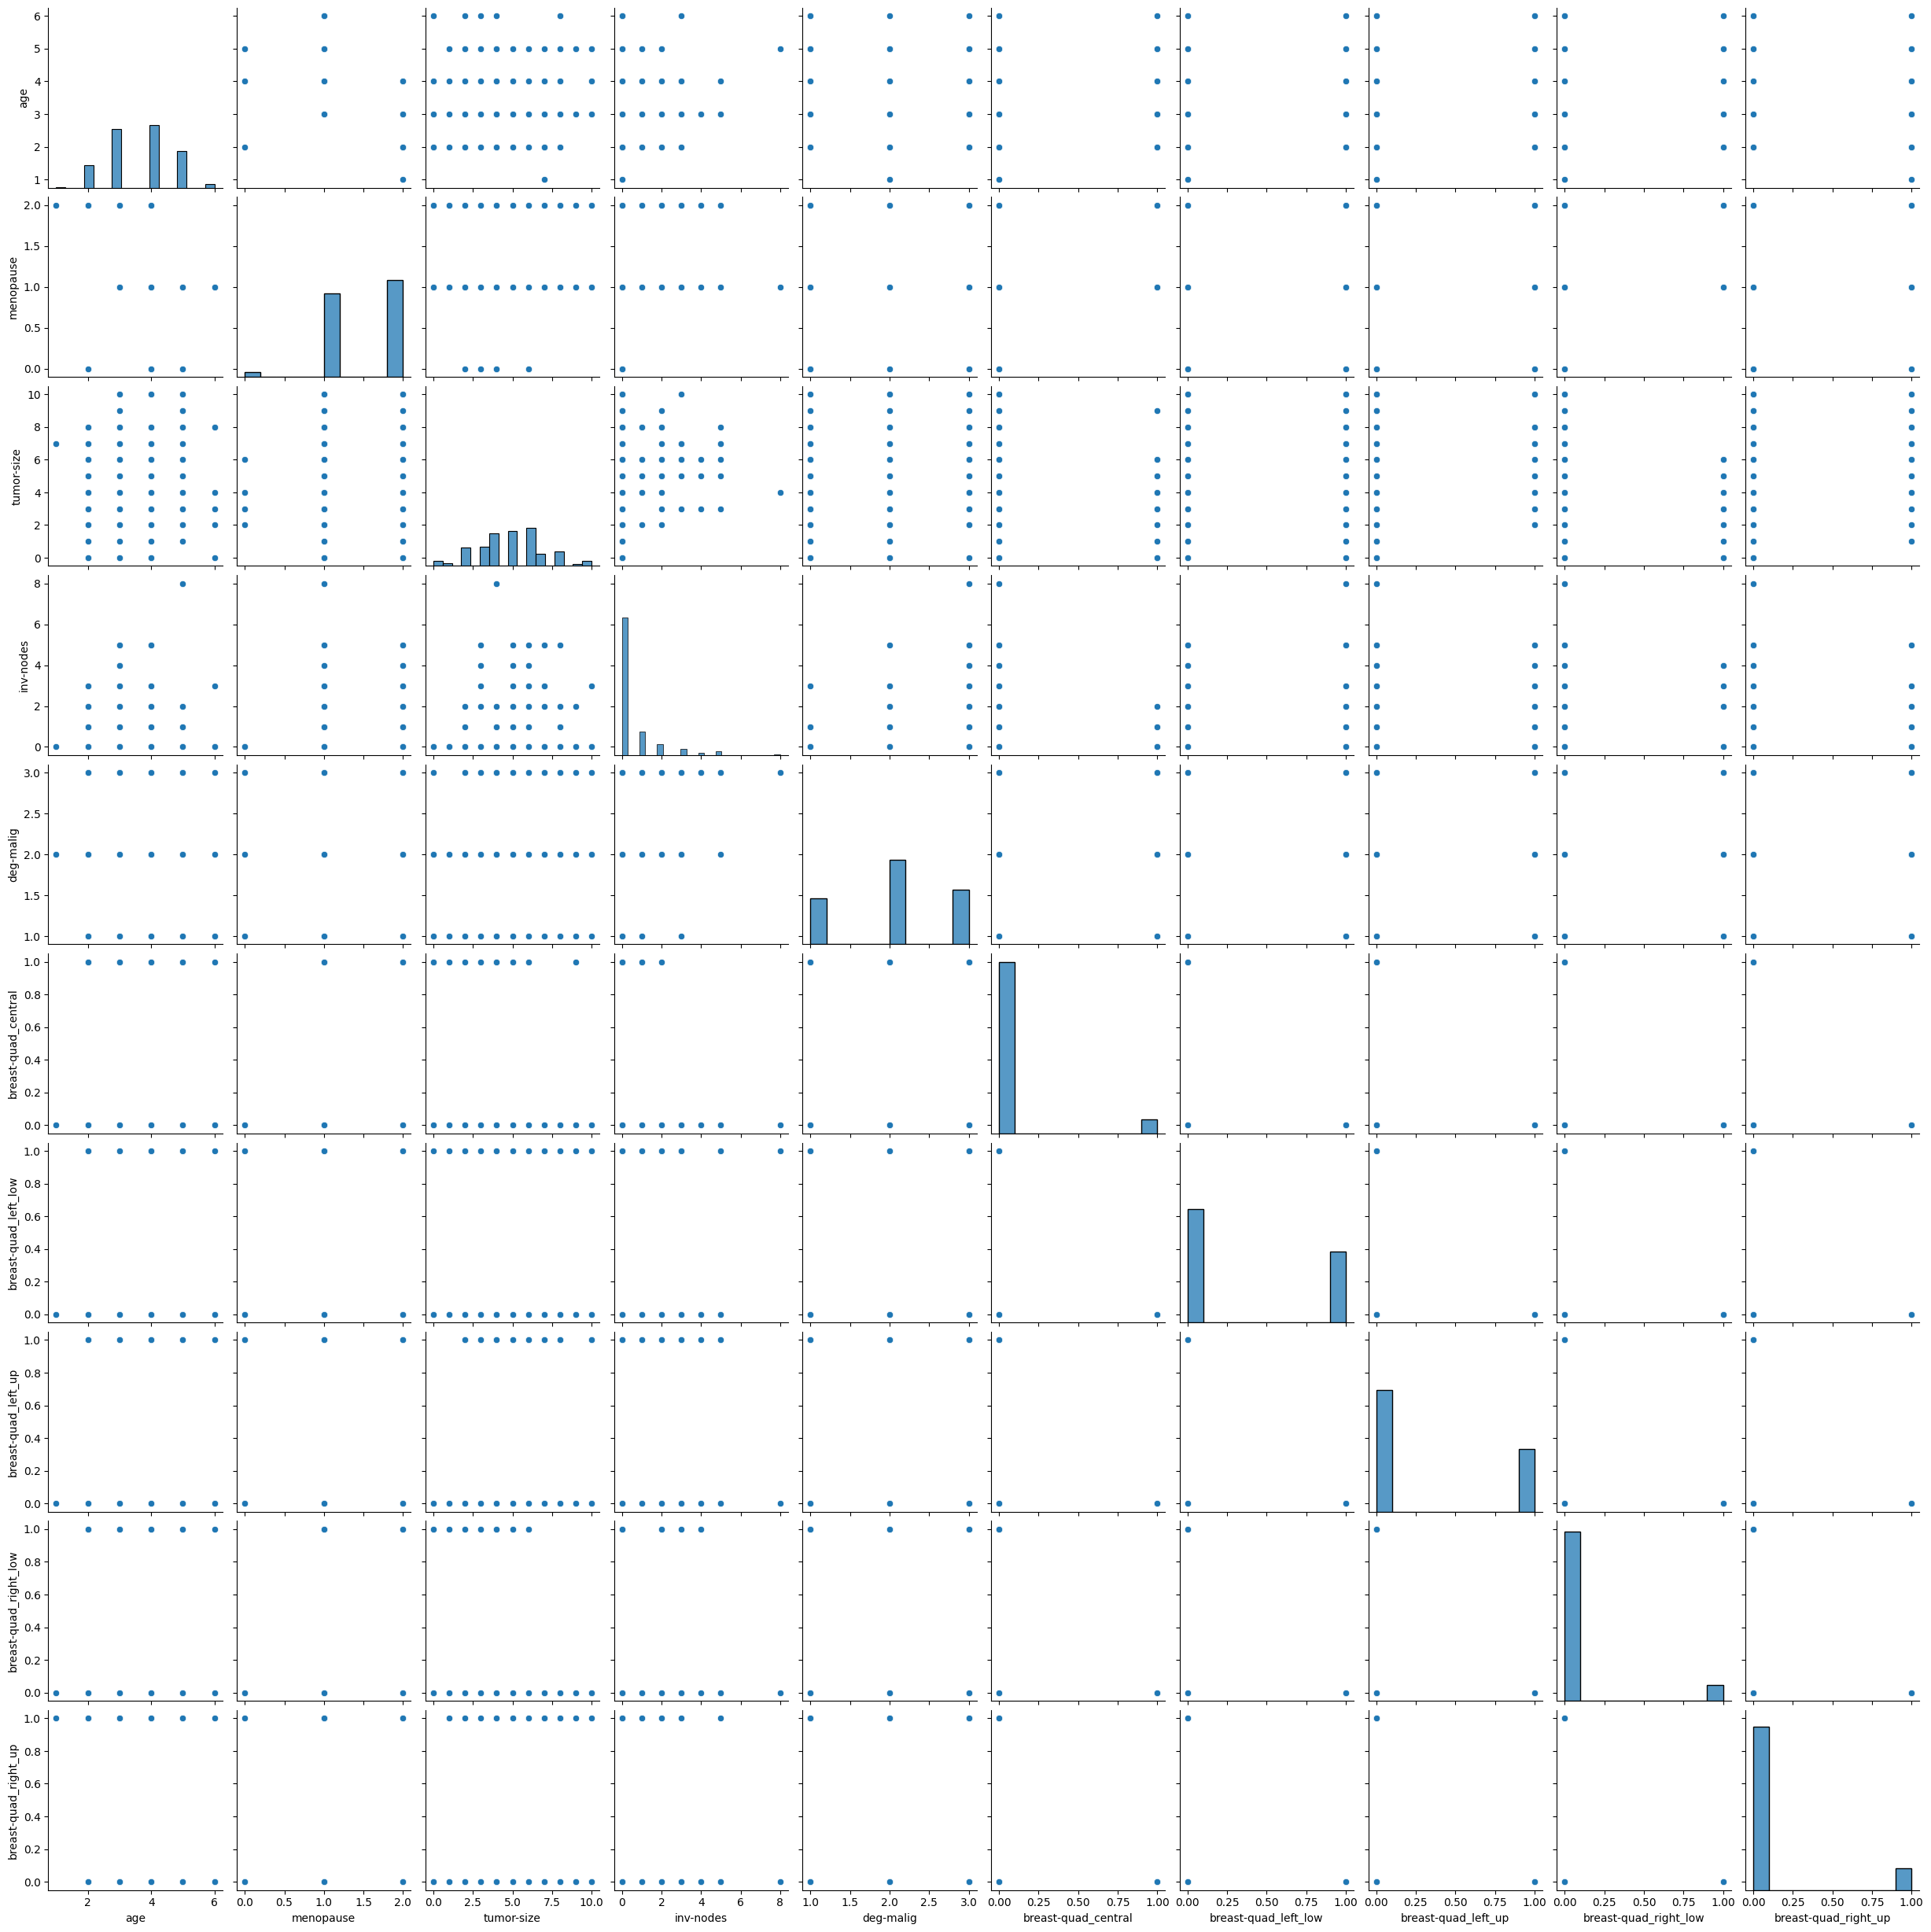

In [326]:
sns.pairplot(bcdf)

In [327]:
bcdf.describe(include='all')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
count,285,285.000000,285.000000,285.000000,285.000000,285,285.000000,285,285,285.000000,285.000000,285.000000,285.000000,285.000000
unique,2,NaN,NaN,NaN,NaN,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,0,NaN,NaN,NaN,NaN,0,NaN,1,0,NaN,NaN,NaN,NaN,NaN
freq,200,NaN,NaN,NaN,NaN,229,NaN,151,217,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.670175,1.498246,4.877193,0.526316,NaN,2.045614,NaN,NaN,0.073684,0.385965,0.340351,0.084211,0.115789
std,NaN,1.008758,0.547880,2.108586,1.152237,NaN,0.737351,NaN,NaN,0.261716,0.487679,0.474661,0.278192,0.320535
min,NaN,1.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,3.000000,1.000000,4.000000,0.000000,NaN,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,4.000000,2.000000,5.000000,0.000000,NaN,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,4.000000,2.000000,6.000000,1.000000,NaN,3.000000,NaN,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
